In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import random
import networkx as nx
import warnings
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE
import networkx as nx
from causalnex.structure.dynotears import from_pandas_dynamic 

import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from utils.dag import agg_simulation, run_sim, run_eval

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


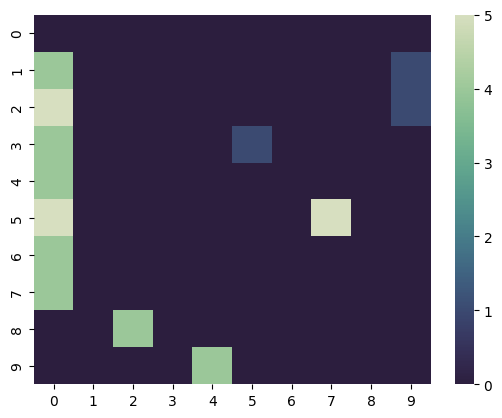

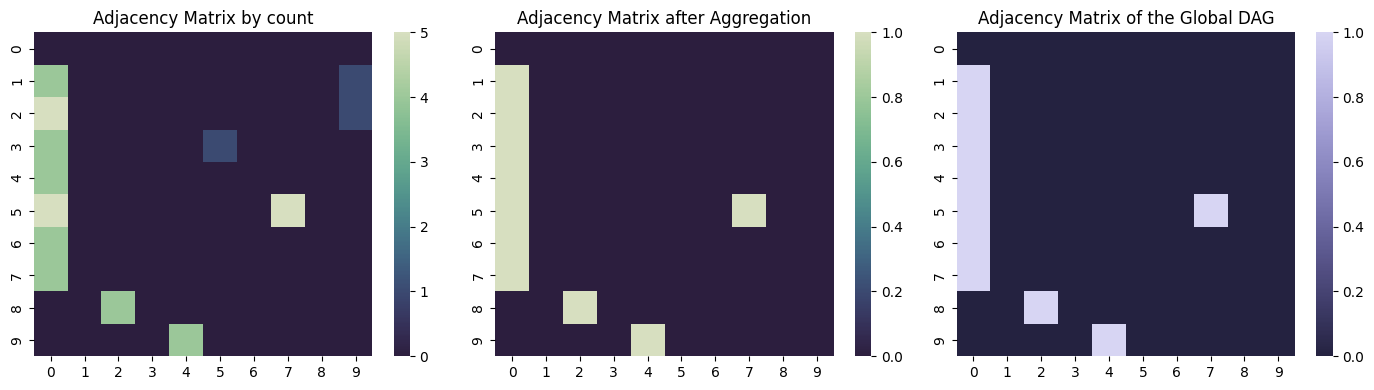

In [19]:
agg_matrix, perturbed_adj_matrix, initial_matrix = run_sim(10,10,5,plott=True)

#### LOOCV 

In [23]:
perturbed_adj_matrix = [initial_matrix] + perturbed_adj_matrix
run_eval(perturbed_adj_matrix)

[0.0, 0.0, 0.0, 0.01, 0.01, 0.02, 0.02, 0.04]

#### Weighted aggregation

In [ ]:
import numpy as np

def adjust_matrix_ratio(matrix_list, target_ratio):
    new_matrix_list = []
    for i in range(len(matrix_list)): 
        new_matrix_list += [matrix_list[i]] * target_ratio[i]
#     adjusted_matrix = matrix * scaling_factor
    return new_matrix_list


# Assuming matrix_list is a list of matrices and target_ratio_list is the desired ratio list
matrix_list = perturbed_adj_matrix[1:]  # Your list of matrices
target_ratio_list = ratio_list  # Your desired ratio list

# Call the function to adjust the matrices
adjusted_matrices = adjust_matrix_ratio(matrix_list, target_ratio_list)

0


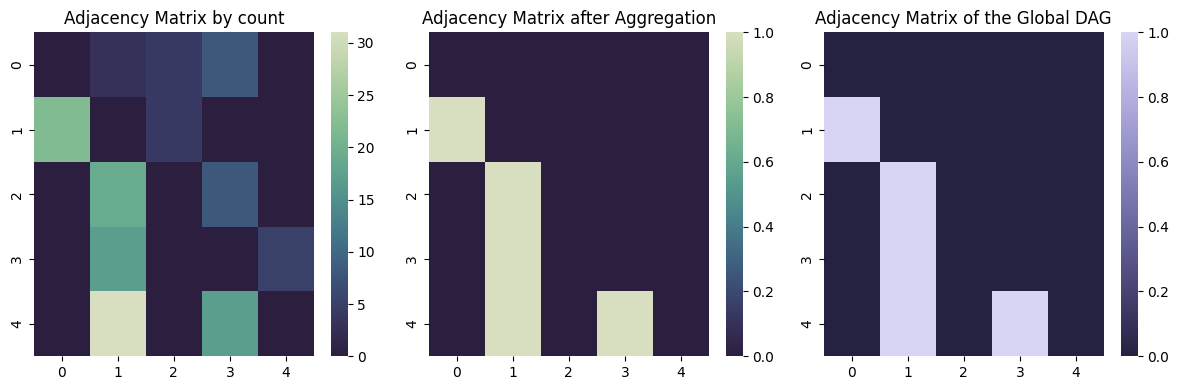

In [21]:
all_vote = np.array(adjusted_matrices)
majority_vote_matrix = (np.mean(all_vote, axis=0) > 0.4).astype(int)
count = np.sum(all_vote, axis = 0)
# sns.heatmap(count, cmap=cmap, annot=False, fmt="d")
print(np.sum(np.abs(majority_vote_matrix - initial_matrix)))

plt.figure(figsize=(12, 4))  
plt.subplot(1, 3, 1)
sns.heatmap(count, cmap=cmap, annot=False, fmt="d")
plt.title("Adjacency Matrix by count")

plt.subplot(1, 3, 2)
sns.heatmap(majority_vote_matrix, cmap=cmap, annot=False, fmt="d")
plt.title("Adjacency Matrix after Aggregation")

plt.subplot(1, 3, 3)
sns.heatmap(initial_matrix, cmap=cmap_1, annot=False, fmt="d")
plt.title("Adjacency Matrix of the Global DAG")

plt.savefig('out/'+'adj_count_5_perturbation.pdf')
plt.tight_layout()
plt.show()

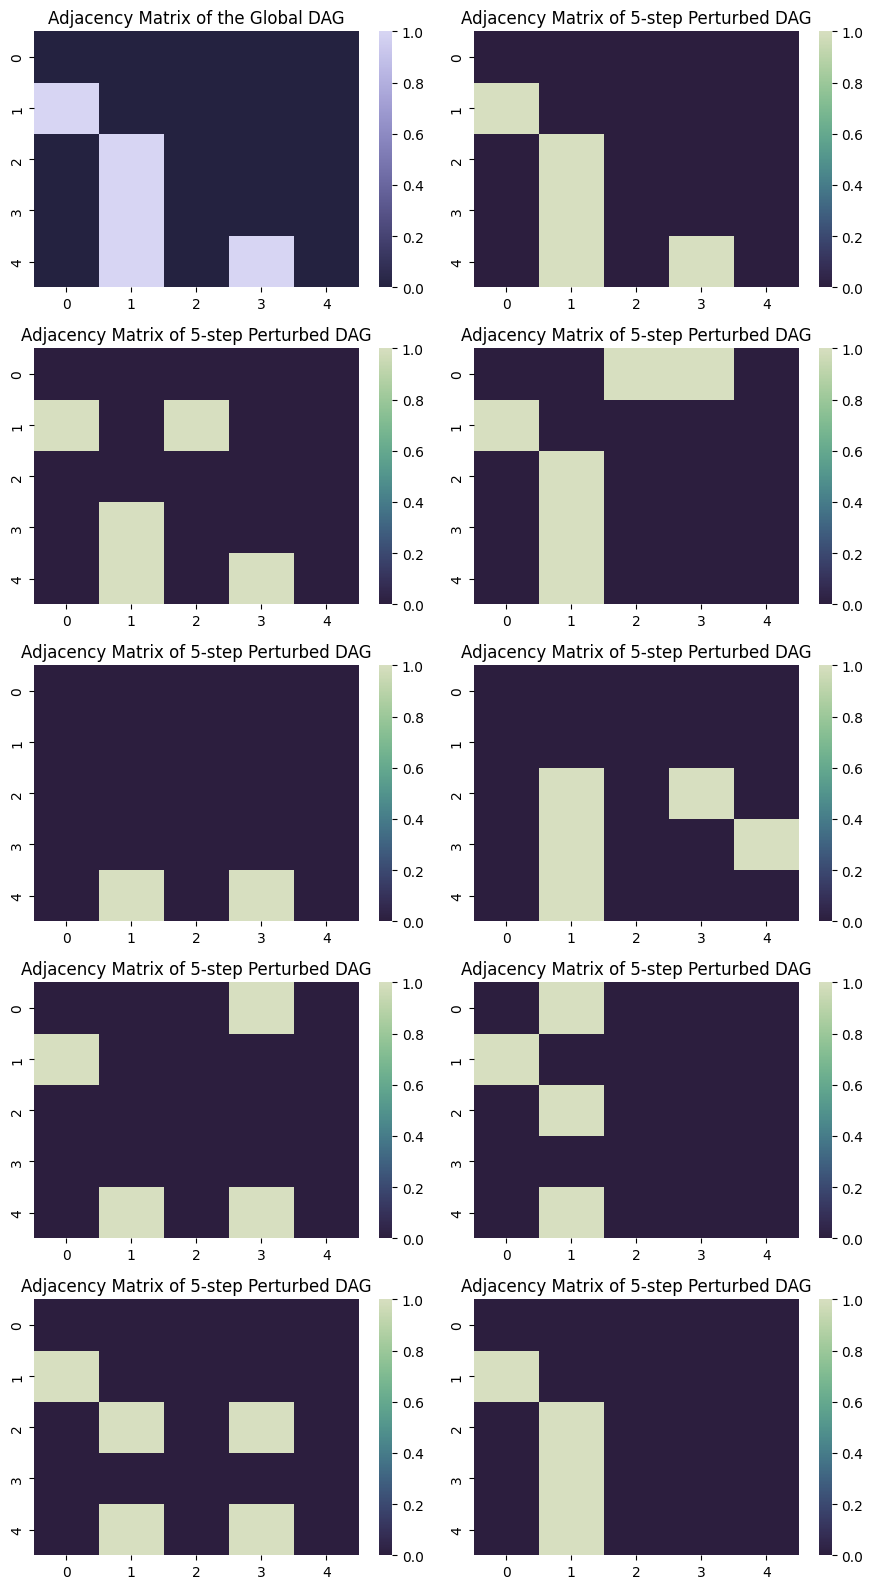

In [22]:
plt.figure(figsize=(9, 16))    
    
plt.subplot(5, 2, 1)
sns.heatmap(perturbed_adj_matrix[0], cmap=cmap_1, annot=False, fmt="d")
plt.title("Adjacency Matrix of the Global DAG")     

plt.subplot(5, 2, 2)
sns.heatmap(perturbed_adj_matrix[1], cmap=cmap, annot=False, fmt="d")
plt.title("Adjacency Matrix of 5-step Perturbed DAG")
    
plt.subplot(5, 2, 3)
sns.heatmap(perturbed_adj_matrix[2], cmap=cmap, annot=False, fmt="d")
plt.title("Adjacency Matrix of 5-step Perturbed DAG")

plt.subplot(5, 2, 4)
sns.heatmap(perturbed_adj_matrix[3], cmap=cmap, annot=False, fmt="d")
plt.title("Adjacency Matrix of 5-step Perturbed DAG")

plt.subplot(5, 2, 5)
sns.heatmap(perturbed_adj_matrix[4], cmap=cmap, annot=False, fmt="d")
plt.title("Adjacency Matrix of 5-step Perturbed DAG")

plt.subplot(5, 2, 6)
sns.heatmap(perturbed_adj_matrix[5], cmap=cmap, annot=False, fmt="d")
plt.title("Adjacency Matrix of 5-step Perturbed DAG")
    
plt.subplot(5, 2, 7)
sns.heatmap(perturbed_adj_matrix[6], cmap=cmap, annot=False, fmt="d")
plt.title("Adjacency Matrix of 5-step Perturbed DAG")

plt.subplot(5, 2, 8)
sns.heatmap(perturbed_adj_matrix[7], cmap=cmap, annot=False, fmt="d")
plt.title("Adjacency Matrix of 5-step Perturbed DAG")

plt.subplot(5, 2, 9)
sns.heatmap(perturbed_adj_matrix[8], cmap=cmap, annot=False, fmt="d")
plt.title("Adjacency Matrix of 5-step Perturbed DAG")

plt.subplot(5, 2, 10)
sns.heatmap(perturbed_adj_matrix[9], cmap=cmap, annot=False, fmt="d")
plt.title("Adjacency Matrix of 5-step Perturbed DAG")   

# plt.subplot(5, 2, 10)
# sns.heatmap(perturbed_adj_matrix[10], cmap=cmap, annot=False, fmt="d")
# plt.title("Adjacency Matrix of 5-step Perturbed DAG") 

plt.savefig('out/'+'5_perturbation.pdf')
plt.tight_layout()
plt.show()